## activate the environment

In [3]:
using Pkg; Pkg.activate("/Users/jacky/repo/BasicIntegration.jl/")

  Activating project at `~/repo/BasicIntegration.jl`


In [14]:
using StatsPlots, HaltonSequences, Random, QuadGK, Distributions, StaticArrays, BasicIntegration
g(x; c=1e-9, k=2) = c * x^(-k-1) * (1-x)^(k+1)

a = 1e-5  # upper bound
b = 1  # lower bound

trueVal = quadgk(g, 1e-5, 1)[1]
# n = 19, 20, 21, 23, 26
NodesNum = [524_287, 1_048_575, 2_097_151, 8_388_607, 67_108_863];

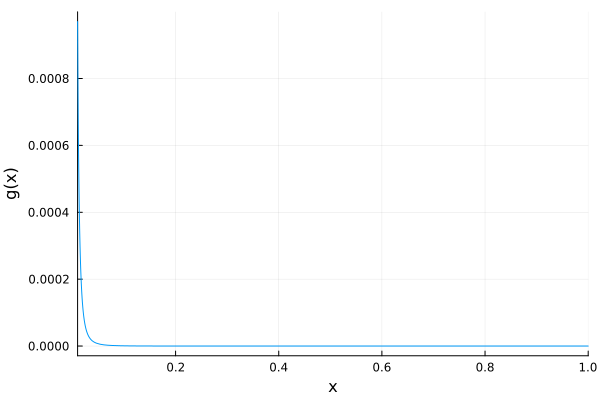

In [34]:
plot(g, xlim=[0.01, 1], label="", xlabel="x", ylabel="g(x)")

In [17]:
GL_res = GLegendre(g, a, b, 3000)

4.999700036020306

In [25]:
MCM_deviate = abs.(MCM(g, a, b, NodesNum, seed=20220923) .- trueVal)

5-element Vector{Float64}:
 3.139678816613813
 2.054479349620714
 1.3201391243382923
 0.06386892761390328
 0.1275526583907718

In [26]:
quaMCM_deviate = abs.(quaMCM(g, a, b, NodesNum) .- trueVal)

5-element Vector{Float64}:
 0.8637475722937928
 0.454145603219275
 0.23272695316879322
 0.059246431345927775
 0.007444657298796287

In [27]:
d = truncated(Normal(1e-3, 1e-3), 0, 1)
IS_deviate = abs.(IShalton(g, a, b, d, NodesNum) .- trueVal)

5-element Vector{Float64}:
 0.0033196368948020805
 0.0016666337451596291
 0.0008396509773742622
 0.00021871106618132075
 3.658947521678613e-5

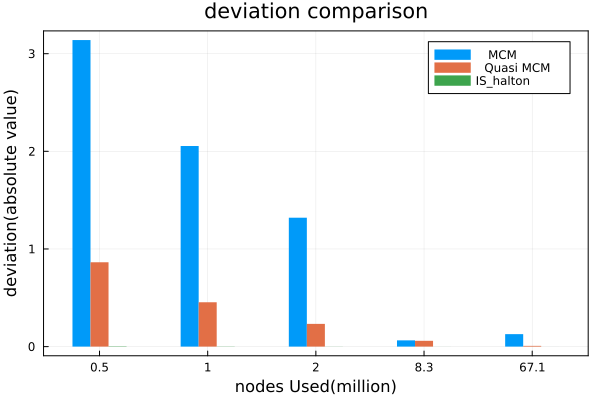

In [33]:
deviateMatrix = [MCM_deviate quaMCM_deviate IS_deviate]
x = ["    0.5    ", "   1   ", "  2  ", " 8.3 ", "67.1"]
x = repeat(x, outer=5)
label = ["   MCM   ", "  Quasi MCM  ", "IS_halton"]
label = repeat(label, inner=5)
groupedbar(x, deviateMatrix, group=label, xlabel="nodes Used(million)",
            ylabel="deviation(absolute value)", title="deviation comparison",
            bar_width=0.5, lw=0, framestyle=:box)